In [1]:
#load all libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [2]:
# Load dataset
df = pd.read_csv(r"C:\Users\user\Desktop\project\Untitled Folder\lending_club_loan_dataset.csv")

# size of the dataset
df.shape


(20000, 15)

In [3]:
df.head()

,id,grade,annual_inc,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,od_ratio,bad_loan
0,11454641,A,100000.0,1,1,RENT,26.27,credit_card,36 months,1,NaN,43.2,0.0,0.160624,0
1,9604874,A,83000.0,0,4,OWN,5.39,credit_card,36 months,0,NaN,21.5,0.0,0.810777,0
2,9684700,D,78000.0,0,11,MORTGAGE,18.45,debt_consolidation,60 months,1,NaN,46.3,0.0,0.035147,1
3,9695736,D,37536.0,0,6,MORTGAGE,12.28,medical,60 months,0,NaN,10.7,0.0,0.534887,1
4,9795013,D,65000.0,0,11,MORTGAGE,11.26,debt_consolidation,36 months,0,NaN,15.2,0.0,0.166500,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     20000 non-null  int64  
 1   grade                  20000 non-null  object 
 2   annual_inc             20000 non-null  float64
 3   short_emp              20000 non-null  int64  
 4   emp_length_num         20000 non-null  int64  
 5   home_ownership         18509 non-null  object 
 6   dti                    19846 non-null  float64
 7   purpose                20000 non-null  object 
 8   term                   20000 non-null  object 
 9   last_delinq_none       20000 non-null  int64  
 10  last_major_derog_none  574 non-null    float64
 11  revol_util             20000 non-null  float64
 12  total_rec_late_fee     20000 non-null  float64
 13  od_ratio               20000 non-null  float64
 14  bad_loan               20000 non-null  int64  
dtypes:

In [5]:
# Label ratio
df['bad_loan'].value_counts(normalize = True)

bad_loan
0    0.8
1    0.2
Name: proportion, dtype: float64

<Axes: xlabel='home_ownership', ylabel='count'>

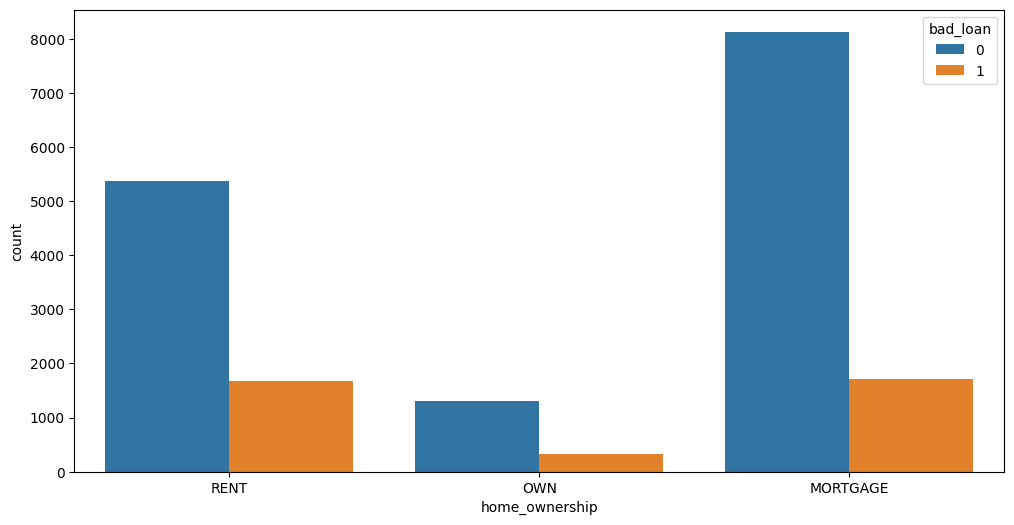

In [6]:
# Distribution of home_ownership based on churn status
plt.figure(figsize = (12,6))
sns.countplot(x = 'home_ownership', hue = 'bad_loan', data = df)



<Axes: xlabel='term', ylabel='count'>

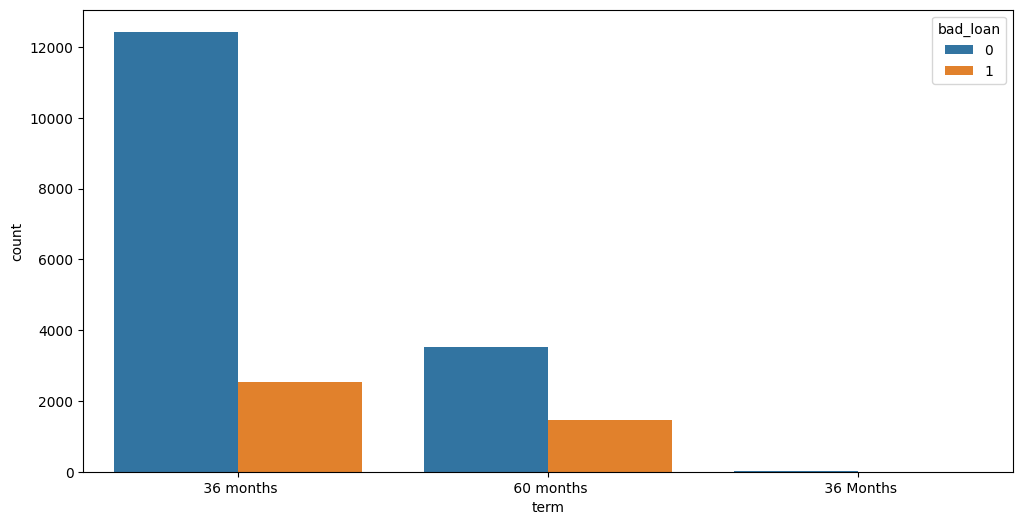

In [7]:
# Distribution of term based on churn status
plt.figure(figsize = (12,6))
sns.countplot(x = 'term', hue = 'bad_loan', data = df)

<Axes: xlabel='grade', ylabel='count'>

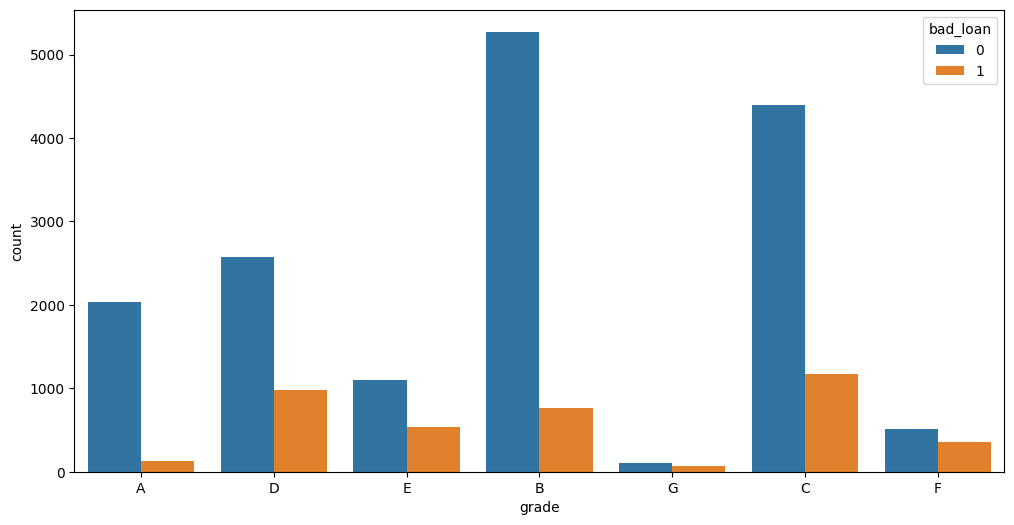

In [8]:
# Distribution of grade based on churn status
plt.figure(figsize = (12,6))
sns.countplot(x = 'grade', hue = 'bad_loan', data = df)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'credit_card'),
  Text(1, 0, 'debt_consolidation'),
  Text(2, 0, 'medical'),
  Text(3, 0, 'other'),
  Text(4, 0, 'home_improvement'),
  Text(5, 0, 'small_business'),
  Text(6, 0, 'major_purchase'),
  Text(7, 0, 'vacation'),
  Text(8, 0, 'car'),
  Text(9, 0, 'house'),
  Text(10, 0, 'moving'),
  Text(11, 0, 'wedding')])

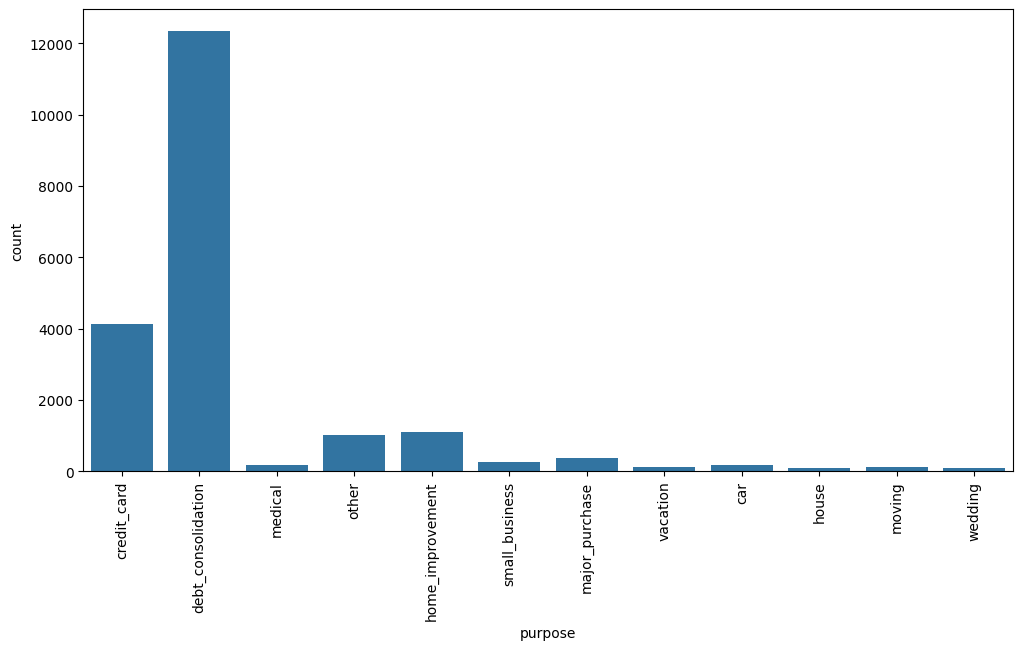

In [9]:
# Distribution of purpose 
plt.figure(figsize = (12,6))
sns.countplot(x = 'purpose', data = df)
plt.xticks(rotation = 90)

<Axes: xlabel='bad_loan', ylabel='annual_inc'>

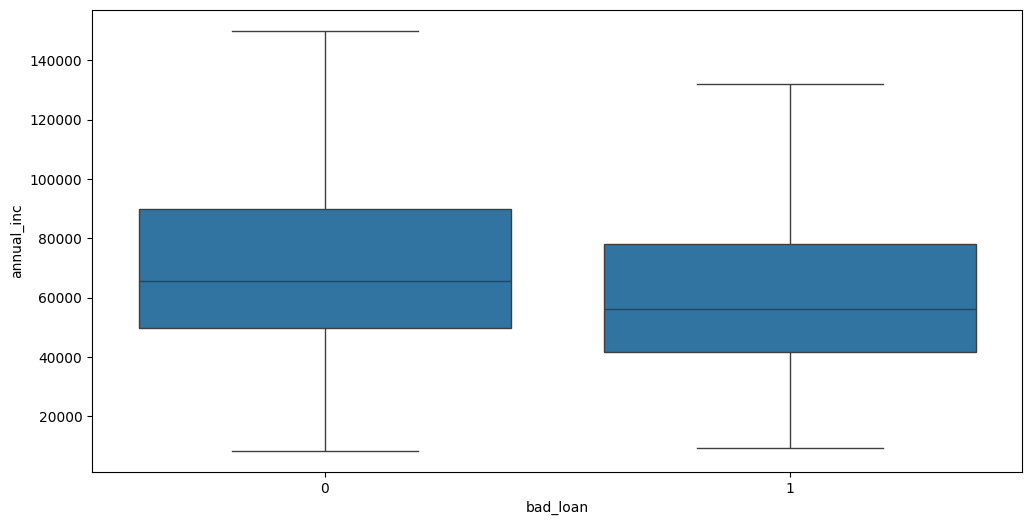

In [10]:
# Distribution of annual income based on churn status
plt.figure(figsize = (12,6))
sns.boxplot(x = 'bad_loan', y ='annual_inc', data = df, showfliers = False)

<Axes: xlabel='bad_loan', ylabel='dti'>

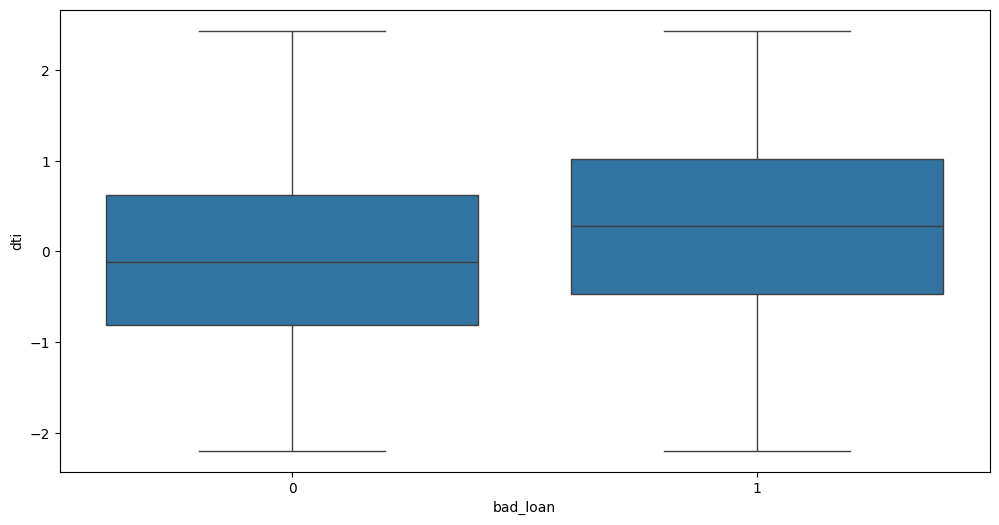

In [20]:
# Distribution of dti based on churn status
plt.figure(figsize = (12,6))
sns.boxplot(x = 'bad_loan', y ='dti', data = df, showfliers = False)


In [12]:
# Impute NULL values in home ownership by mode
df['home_ownership'] = df['home_ownership'].fillna(df['home_ownership'].mode()[0])

# Impute NULL values in dti by mean
df['dti'] = df['dti'].fillna(df['dti'].mean())

# remove last_major_derog_none columns as it contains a lot of NULL values
df.drop(['last_major_derog_none'], axis = 1, inplace = True)

# remove inconsistencies in term feature
df['term'] = df['term'].apply(lambda i : i.lower())

In [13]:
# one hot encoding
cols_to_encode = ['grade', 'home_ownership', 'purpose', 'term']
df = pd.get_dummies(data = df, columns = cols_to_encode, drop_first = True)

# Standard Scaler
standard_scaler = StandardScaler()
feature_cols = ['annual_inc', 'emp_length_num', 'dti','revol_util', 'total_rec_late_fee', 'od_ratio']
transformed_features = standard_scaler.fit_transform(df[feature_cols])

df[feature_cols] = transformed_features

# split data into train and test
feature_cols  = df.columns.tolist()
feature_cols = [i for i in feature_cols if i not in ['id', 'bad_loan']]
x_train, x_test, y_train, y_test = train_test_split(df[feature_cols], df['bad_loan'], test_size = 0.2, random_state = 1234)

In [14]:
logistic_regression_classifier = LogisticRegression(max_iter = 1000, solver = 'lbfgs', random_state = 1234, class_weight = 'balanced' )
logistic_regression_classifier.fit(x_train, y_train)

prediction_values_lr = logistic_regression_classifier.predict(x_test)
print(metrics.classification_report(y_test, prediction_values_lr, digits = 2))
print(metrics.confusion_matrix(y_test, prediction_values_lr))



              precision    recall  f1-score   support

           0       0.88      0.63      0.73      3181
           1       0.32      0.66      0.43       819

    accuracy                           0.64      4000
   macro avg       0.60      0.65      0.58      4000
weighted avg       0.76      0.64      0.67      4000

[[2003 1178]
 [ 275  544]]


In [15]:
knn_classifier = KNeighborsClassifier(n_neighbors = 100)
knn_classifier.fit(x_train, y_train)

prediction_values_knn = knn_classifier.predict(x_test)
print(metrics.classification_report(y_test, prediction_values_knn, digits = 2))
print(metrics.confusion_matrix(y_test, prediction_values_knn))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      3181
           1       0.72      0.04      0.07       819

    accuracy                           0.80      4000
   macro avg       0.76      0.52      0.48      4000
weighted avg       0.79      0.80      0.72      4000

[[3170   11]
 [ 790   29]]


In [16]:
svm_classifier = SVC(random_state = 1234, class_weight = 'balanced', probability = True, verbose = True)
svm_classifier.fit(x_train, y_train)

prediction_values_svm = svm_classifier.predict(x_test)
print(metrics.classification_report(y_test, prediction_values_svm, digits = 2))
print(metrics.confusion_matrix(y_test, prediction_values_svm))

[LibSVM]              precision    recall  f1-score   support

           0       0.88      0.64      0.74      3181
           1       0.32      0.66      0.43       819

    accuracy                           0.64      4000
   macro avg       0.60      0.65      0.59      4000
weighted avg       0.76      0.64      0.68      4000

[[2040 1141]
 [ 281  538]]


In [17]:
decision_tree_classifier = DecisionTreeClassifier(max_depth = 4, random_state = 1234)
decision_tree_classifier.fit(x_train, y_train)

prediction_values_dt = decision_tree_classifier.predict(x_test)
print(metrics.classification_report(y_test, prediction_values_dt, digits = 2))
print(metrics.confusion_matrix(y_test, prediction_values_dt))



              precision    recall  f1-score   support

           0       0.80      1.00      0.89      3181
           1       0.74      0.03      0.06       819

    accuracy                           0.80      4000
   macro avg       0.77      0.51      0.47      4000
weighted avg       0.79      0.80      0.72      4000

[[3172    9]
 [ 794   25]]


In [18]:
# Initialize Random Forest Model
random_forest = RandomForestClassifier(n_estimators = 1000, max_depth = 3, random_state = 1234)
random_forest.fit(x_train, y_train)

prediction_values_rf = random_forest.predict(x_test)
print(metrics.classification_report(y_test, prediction_values_rf, digits = 2))
print(metrics.confusion_matrix(y_test, prediction_values_rf))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      3181
           1       1.00      0.00      0.01       819

    accuracy                           0.80      4000
   macro avg       0.90      0.50      0.45      4000
weighted avg       0.84      0.80      0.71      4000

[[3181    0]
 [ 816    3]]


In [19]:
# Initialize XGBoost Model
xgboost_classifier = XGBClassifier(n_estimators = 5000, max_depth = 4, random_state = 1234, learning_rate = 0.3)
xgboost_classifier.fit(x_train, y_train)

# Predict label for the test data and print classification report and confusion matrix
prediction_values_xgboost = xgboost_classifier.predict(x_test)
print(metrics.classification_report(y_test, prediction_values_xgboost, digits = 2))
print(metrics.confusion_matrix(y_test, prediction_values_xgboost))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      3181
           1       0.34      0.21      0.26       819

    accuracy                           0.75      4000
   macro avg       0.58      0.55      0.56      4000
weighted avg       0.72      0.75      0.73      4000

[[2841  340]
 [ 644  175]]
